In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing,Holt, ExponentialSmoothing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import root_mean_squared_error
from ipywidgets import widgets
from IPython.display import display

<h1 style = 'color:orange'>Time Series</h1>

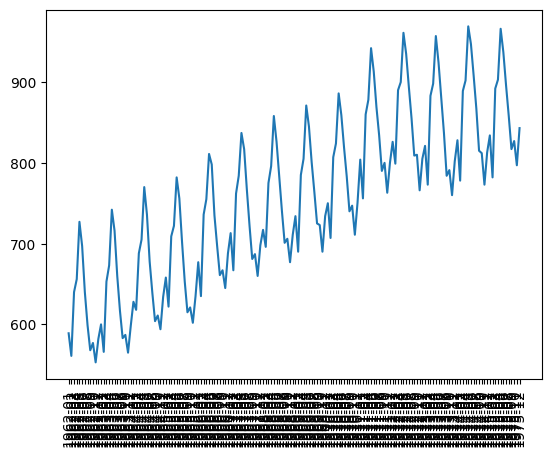

In [2]:
df = pd.read_csv('../Datasets/monthly-milk-production-pounds-p.csv')



plt.plot(df['Month'],df['Milk'])
plt.xticks(rotation = 90);

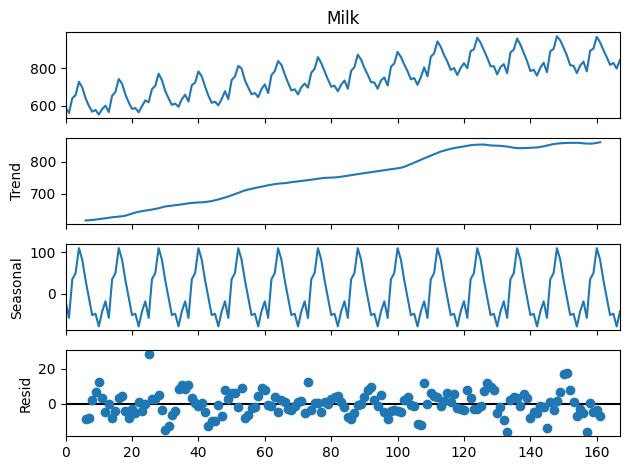

In [3]:
#additive decompostiion

series = df['Milk']
result = seasonal_decompose(series,model='additive',period = 12)
result.plot();

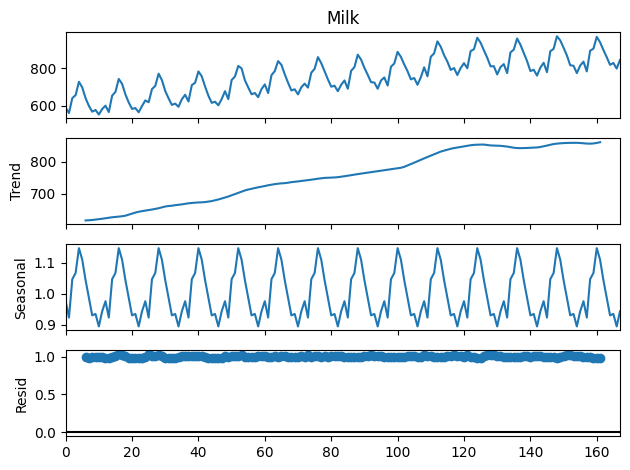

In [4]:
#multiplicative decompostiion

series = df['Milk']
result = seasonal_decompose(series,model='multiclipative',period = 12)
result.plot();

<h1 style = 'color:orange'>Centered Rolling Mean</h1>

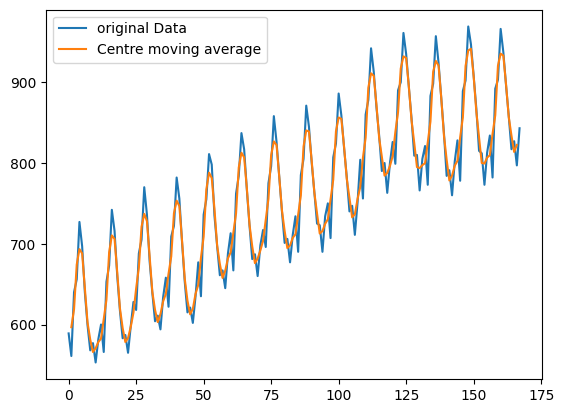

In [5]:
df = pd.read_csv('../Datasets/monthly-milk-production-pounds-p.csv')
x = df['Month']
y = df['Milk']
fcast = y.rolling(3,center=True).mean()
plt.plot(y,label = 'original Data')
plt.plot(fcast,label = 'Centre moving average')
plt.legend(loc = 'best')
plt.show()


<h1>Tailing Rolling Mean</h1>

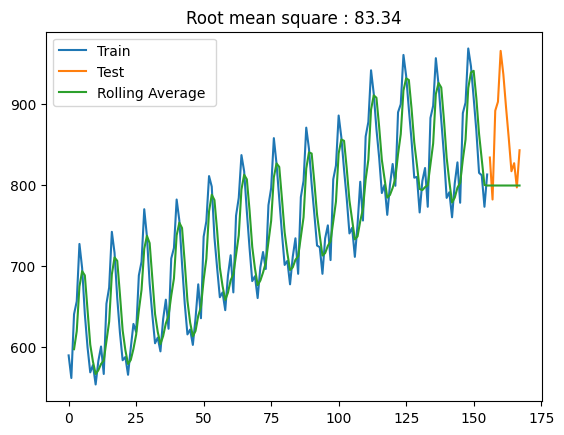

In [6]:
df = pd.read_csv('../Datasets/monthly-milk-production-pounds-p.csv')
x = df['Month']
y = df['Milk']

y_train = df['Milk'].iloc[:-12]
y_test = df['Milk'].iloc[-12:]


span = 3 
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)

rmse = root_mean_squared_error(y_test,MA_series)


plt.plot(y_train,label = 'Train')
plt.plot(y_test,label = 'Test')
plt.plot(MA_fcast, label= 'Rolling Average ')
plt.title(f'Root mean square : {rmse:.2f}')
plt.legend()



<h1 style = color:orange>Simple Exponential Smoothing</h1>


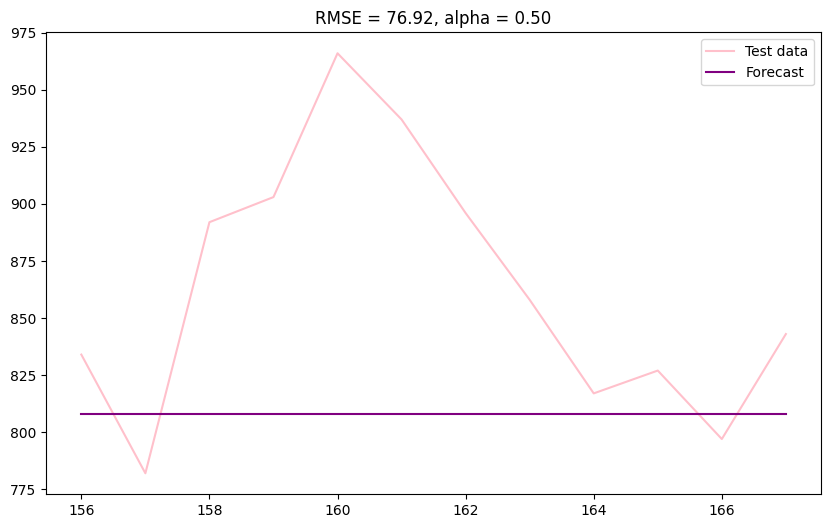

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), Output()), _d…

<function __main__.simple_exp(alpha)>

In [7]:
df = pd.read_csv('../Datasets/monthly-milk-production-pounds-p.csv')
x = df['Month']
y = df['Milk']

y_train = df['Milk'].iloc[:-12]
y_test = df['Milk'].iloc[-12:]

alpha = 0.2
ses = SimpleExpSmoothing(y_train)
# def simple_exp(alpha):
#     fit1 = ses.fit(smoothing_level=alpha)
#     fcast1 = fit1.forecast(len(y_test))
#     y_test.plot(color = 'pink',label = 'test_pickles.ipynb')
#     fcast1.plot(color = 'purple',label = 'Forecast')
#     rmse = root_mean_squared_error(y_test,fcast1)
#     plt.title(f'RMSE = {rmse:.2f}, aplha = {alpha:.2f}')
#     plt.legend(loc = 'best')
#     plt.show();

# widgets.interact(simple_exp,alpha = (0.01,1,0.01));

def simple_exp(alpha):
    ses = SimpleExpSmoothing(y_train)
    fit1 = ses.fit(smoothing_level=alpha, optimized=False)
    fcast1 = fit1.forecast(len(y_test))
    
    plt.figure(figsize=(10,6))
    y_test.plot(color='pink', label='Test data')
    fcast1.plot(color='purple', label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f'RMSE = {rmse:.2f}, alpha = {alpha:.2f}')
    plt.legend(loc='best')
    plt.show()

# Create interactive widget for alpha parameter in range 0.01 to 1
widgets.interact(simple_exp, alpha=(0.01, 1, 0.01))

<h1 style = color:Orange>Holt's Linear Trend</h1>

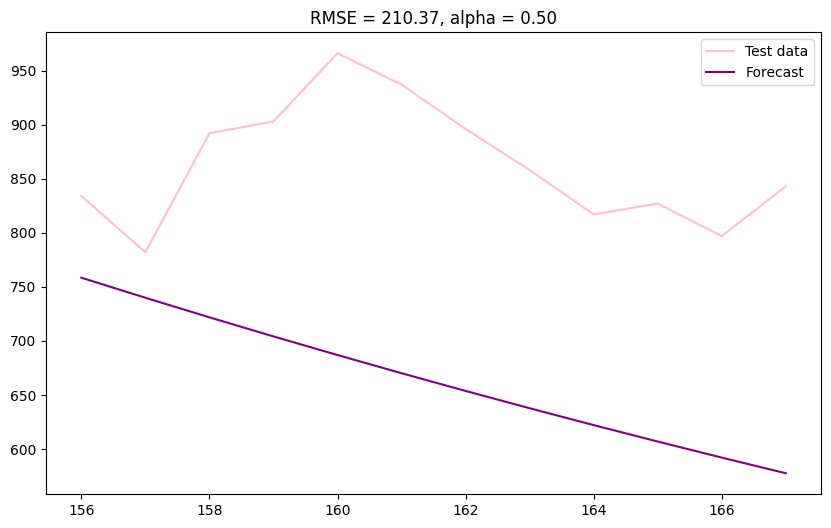

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.hl(alpha, beta, exponentiality)>

In [14]:
df = pd.read_csv('../Datasets/monthly-milk-production-pounds-p.csv')
x = df['Month']
y = df['Milk']

y_train = df['Milk'].iloc[:-12]
y_test = df['Milk'].iloc[-12:]

# alpha = 0.01
# beta = 0.01
# ses = Holt(y_train)
# fit1 = ses.fit(smoothing_level=alpha,smoothing_trend = beta, optimized=False)
# fcast1 = fit1.forecast(len(y_test))
        
# plt.figure(figsize=(10,6))
# y_test.plot(color='pink', label='Test data')
# fcast1.plot(color='purple', label='Forecast')
# rmse = root_mean_squared_error(y_test, fcast1)
# plt.title(f'RMSE = {rmse:.2f}, alpha = {alpha:.2f}')
# plt.legend(loc='best')
# plt.show()

def hl(alpha,beta,exponentiality):
    ses = Holt(y_train,exponential=exponentiality)
    fit1 = ses.fit(smoothing_level=alpha,smoothing_trend=beta, optimized=False)
    fcast1 = fit1.forecast(len(y_test))
    
    plt.figure(figsize=(10,6))
    y_test.plot(color='pink', label='Test data')
    fcast1.plot(color='purple', label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f'RMSE = {rmse:.2f}, alpha = {alpha:.2f}')
    plt.legend(loc='best')
    plt.show()


# Create interactive widget for alpha parameter in range 0.01 to 1
widget = widgets.interact(hl, alpha=(0.01, 1, 0.01),beta=(0.01, 1, 0.01),exponentiality = [True,False])
display(widget)

<h1>Dampped Trend</h1>

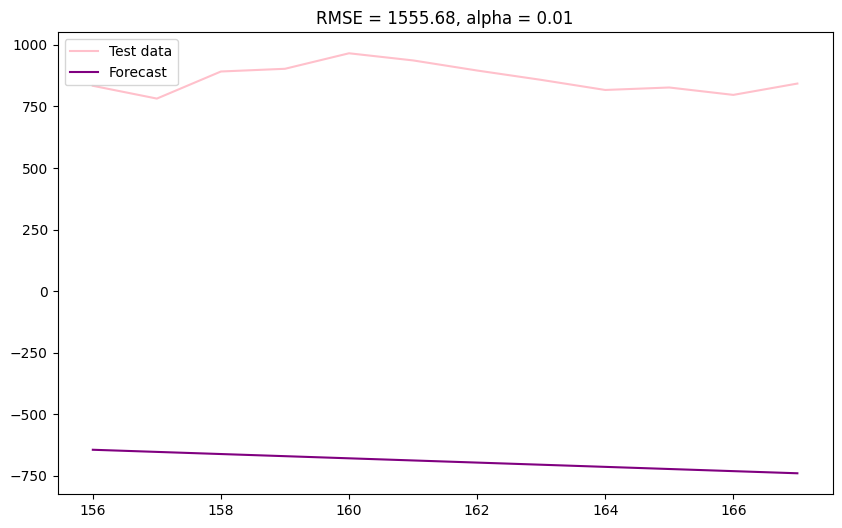

In [18]:
df = pd.read_csv('../Datasets/monthly-milk-production-pounds-p.csv')
x = df['Month']
y = df['Milk']

y_train = df['Milk'].iloc[:-12]
y_test = df['Milk'].iloc[-12:]

alpha = 0.01
beta = 0.01
phi = 0.5

ses = Holt(y_train)
fit1 = ses.fit(smoothing_level=alpha,smoothing_trend = beta, damping_trend=phi,optimized=False)
fcast1 = fit1.forecast(len(y_test))
        
plt.figure(figsize=(10,6))
y_test.plot(color='pink', label='Test data')
fcast1.plot(color='purple', label='Forecast')
rmse = root_mean_squared_error(y_test, fcast1)
plt.title(f'RMSE = {rmse:.2f}, alpha = {alpha:.2f}')
plt.legend(loc='best')
plt.show()


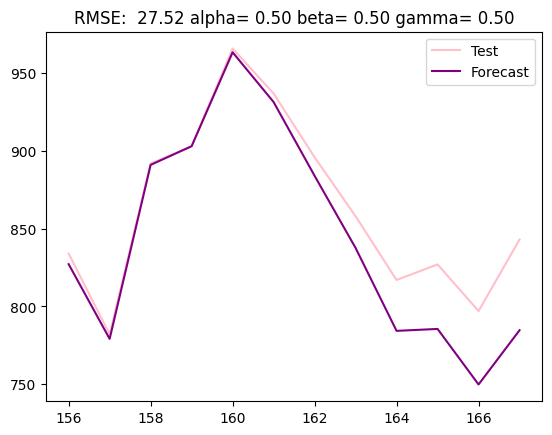

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.hw(alpha, beta, gamma, seasonality, periods=12)>

In [26]:
def hw(alpha, beta, gamma, seasonality, periods=12):
    holt = ExponentialSmoothing(y_train, trend='add', seasonal=seasonality, seasonal_periods=periods)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    fcast1.plot(color='purple', label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f'RMSE: {rmse: .2f} alpha={alpha: .2f} beta={beta: .2f} gamma={gamma: .2f}')
    plt.legend(loc='best')
    plt.show()

widgets.interact(hw, alpha=(0.01, 1, 0.01), beta=(0.01, 1, 0.01), gamma=(0.01, 1, 0.01), seasonality=['add', 'mul'])

<h1>FRED Dataset</h1>

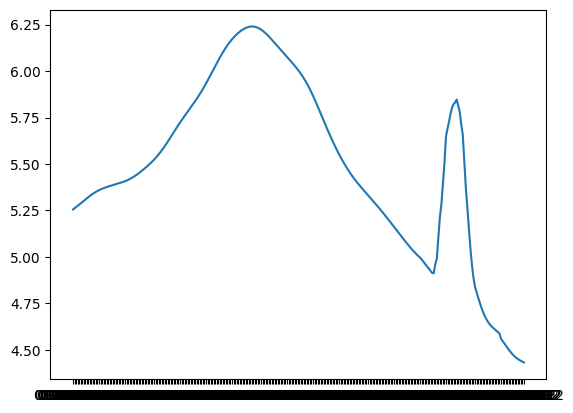

In [28]:
fred  = pd.read_csv('../Datasets/FRED-NROUST.csv')

plt.plot(fred['Date'],fred['Value'])

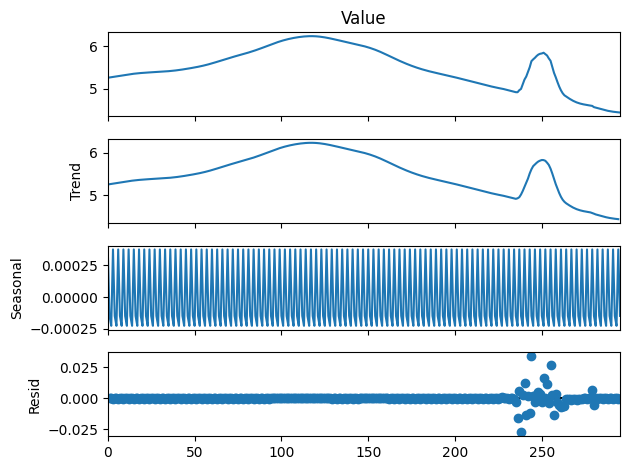

In [44]:
result  = seasonal_decompose(fred['Value'],model='additive',period=3)
result.plot();

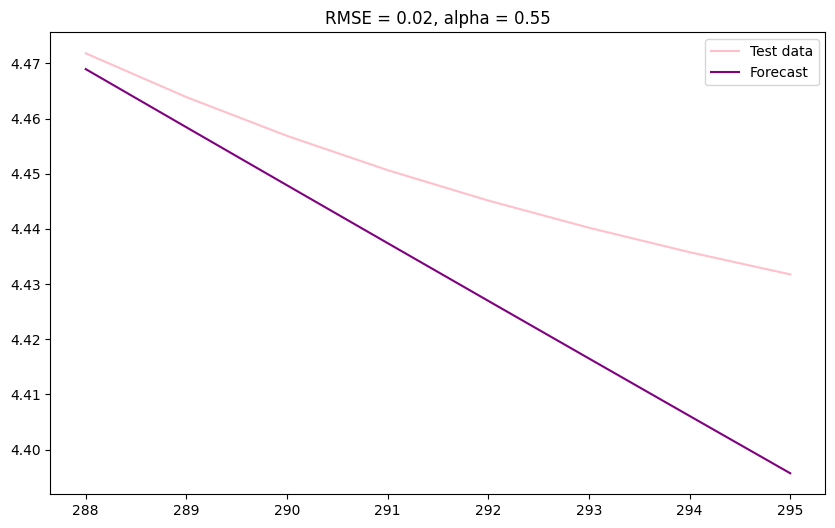

interactive(children=(FloatSlider(value=0.55, description='alpha', max=1.0, min=0.55, step=0.53), FloatSlider(…

<function __main__.hl(alpha, beta, exponentiality)>

In [53]:
fred  = pd.read_csv('../Datasets/FRED-NROUST.csv')
x = fred['Date']
y = fred['Value']

y_train = fred['Value'].iloc[:-8]
y_test = fred['Value'].iloc[-8:]

# alpha = 0.1

# ses = SimpleExpSmoothing(y_train)
# fit1 = ses.fit(smoothing_level=alpha, optimized=False)
# fcast1 = fit1.forecast(len(y_test))
        
# plt.figure(figsize=(10,6))
# y_test.plot(color='pink', label='Test data')
# fcast1.plot(color='purple', label='Forecast')
# rmse = root_mean_squared_error(y_test, fcast1)
# plt.title(f'RMSE = {rmse:.2f}, alpha = {alpha:.2f}')
# plt.legend(loc='best')
# plt.show()

def hl(alpha,beta,exponentiality):
    ses = Holt(y_train,exponential=exponentiality)
    fit1 = ses.fit(smoothing_level=alpha,smoothing_trend=beta, optimized=False)
    fcast1 = fit1.forecast(len(y_test))
    
    plt.figure(figsize=(10,6))
    y_test.plot(color='pink', label='Test data')
    fcast1.plot(color='purple', label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f'RMSE = {rmse:.2f}, alpha = {alpha:.2f}')
    plt.legend(loc='best')
    plt.show()


# Create interactive widget for alpha parameter in range 0.01 to 1
widget = widgets.interact(hl, alpha=(0.55, 1, 0.53),beta=(0.01, 1, 0.01),exponentiality = [True,False])
display(widget)